In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from skimage.morphology import skeletonize 

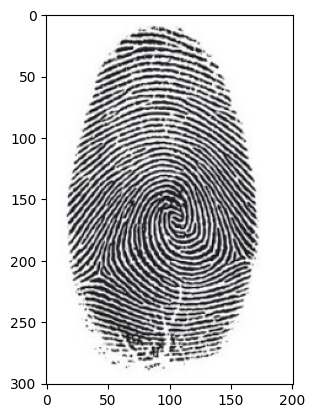

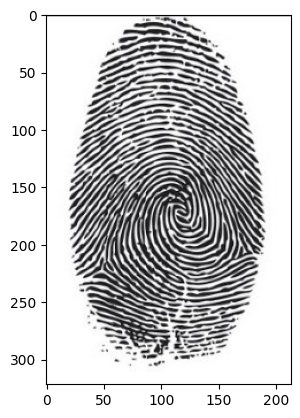

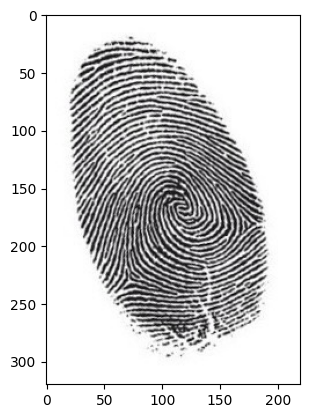

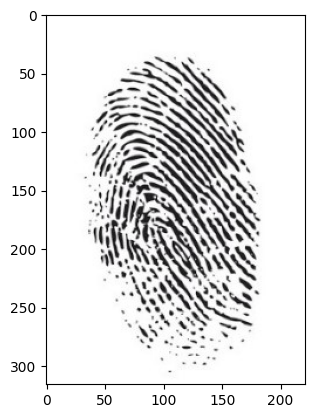

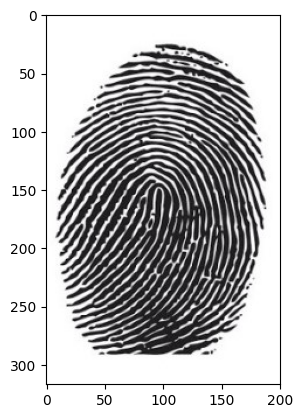

In [73]:
current_dir = os.getcwd()
image_names = os.listdir(os.path.join(current_dir, 'images', 'fingers'))

shutil.rmtree(os.path.join(current_dir, 'images', 'reshape'))
os.mkdir(os.path.join(current_dir, 'images', 'reshape'))

for image_name in image_names:
    try:
        image = cv2.imread(os.path.join(current_dir, 'images', 'fingers', image_name))
        correct = cv2.imwrite(os.path.join(current_dir, 'images', 'reshape', image_name), image[0:300, 0:200])
        plt.imshow(image)
        plt.show()
    except:    
        pass

1.jpg


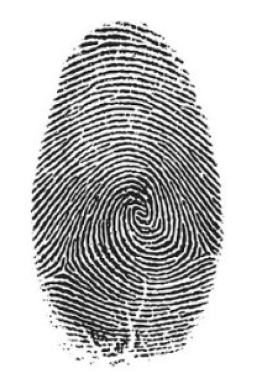

In [74]:
image_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))[0]
print(image_path)
image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis(False)
plt.imshow(image, cmap='gray')
plt.show()

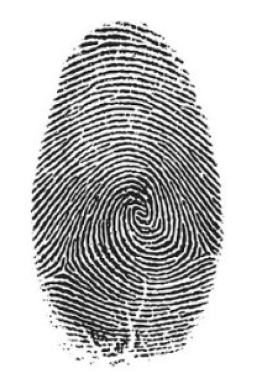

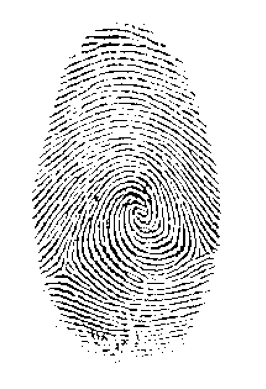

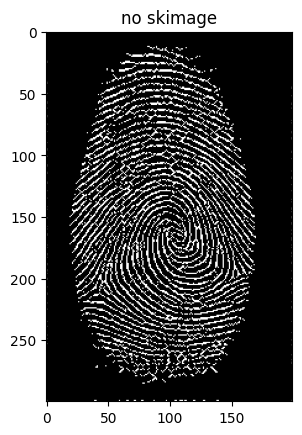

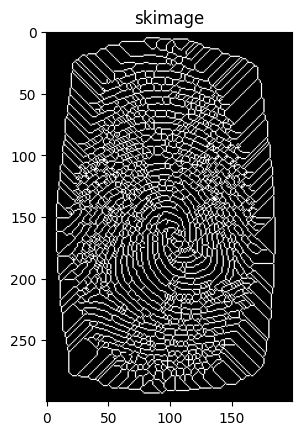

[[255   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0 255]]


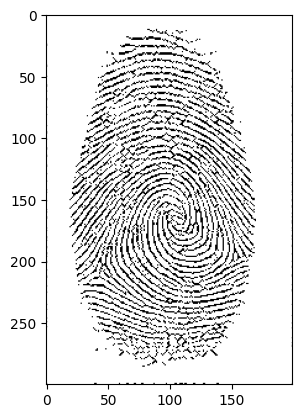

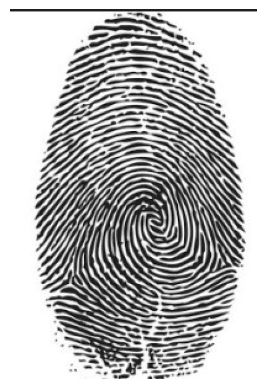

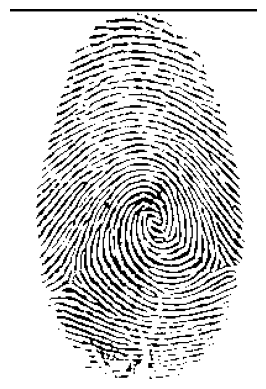

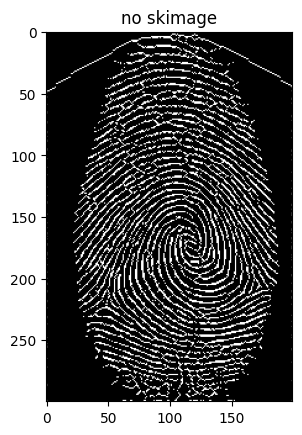

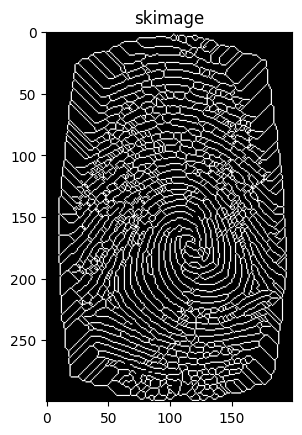

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0 255]]


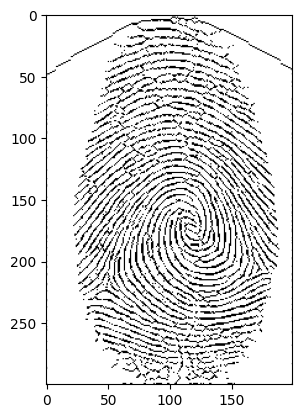

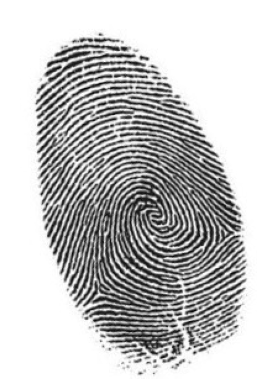

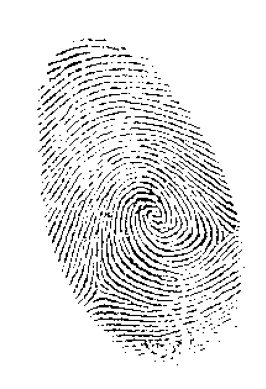

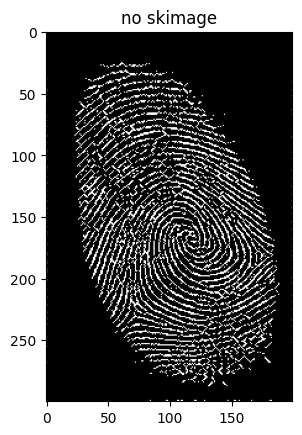

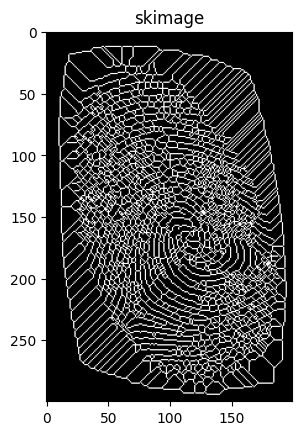

[[255   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0 255]]


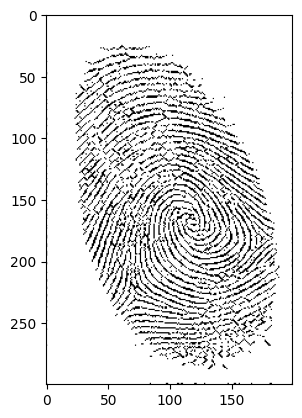

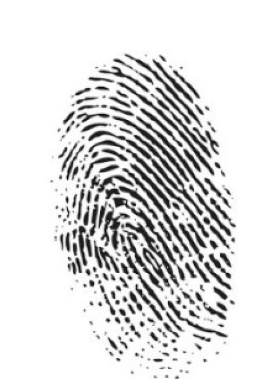

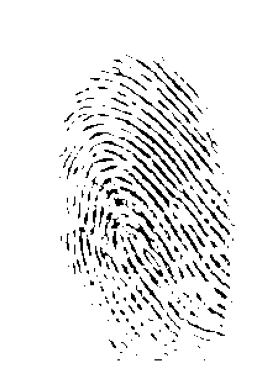

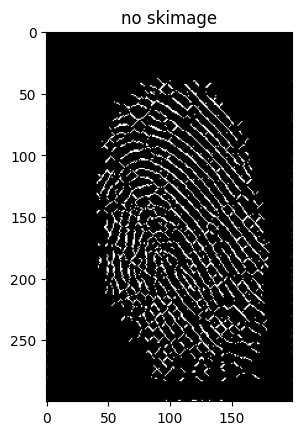

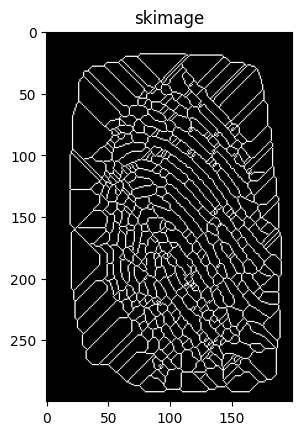

[[255   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0 255]]


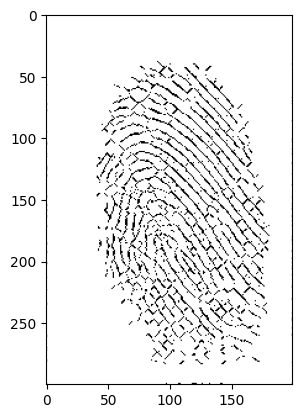

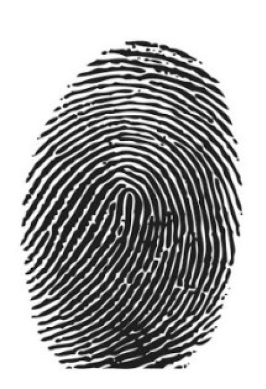

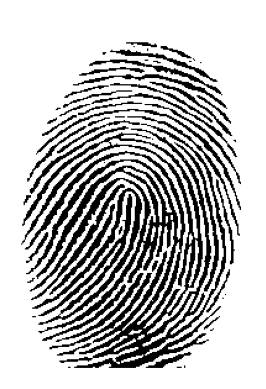

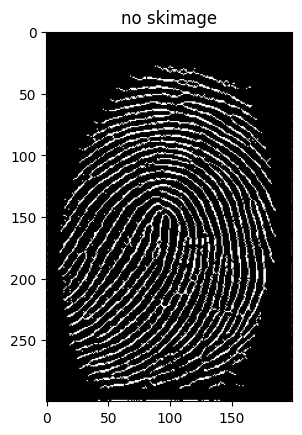

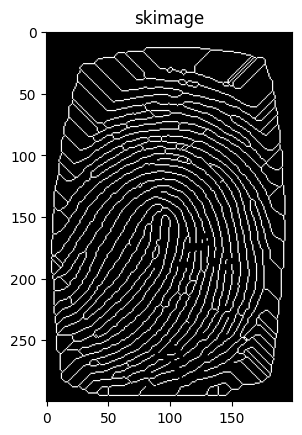

[[255   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0 255]]


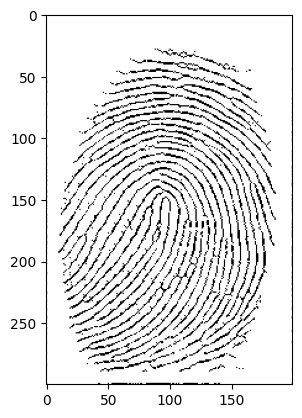

In [75]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
for image_path in images_path:
    image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.axis(False)
    plt.imshow(image, cmap='gray')
    plt.show()
    _, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    plt.axis(False)
    plt.imshow(binarized, cmap='gray')
    plt.show()
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    img = np.copy(binarized)
    size = np.size(img)
    done = False
    skel = np.zeros(img.shape, np.uint8)
    while(not done):
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
    
        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    
    #plt.axis(False)
    plt.title("no skimage")
    plt.imshow(skel, cmap="gray")
    plt.show()
    skelet = skeletonize(binarized, method='lee')
    plt.title("skimage")
    plt.imshow(skelet, cmap="gray")
    plt.show()
    _, skel_inv = cv2.threshold(skel, 1, 255, cv2.THRESH_BINARY_INV)
    print(skel)
    plt.imshow(skel_inv, cmap="gray")
    plt.show()

            

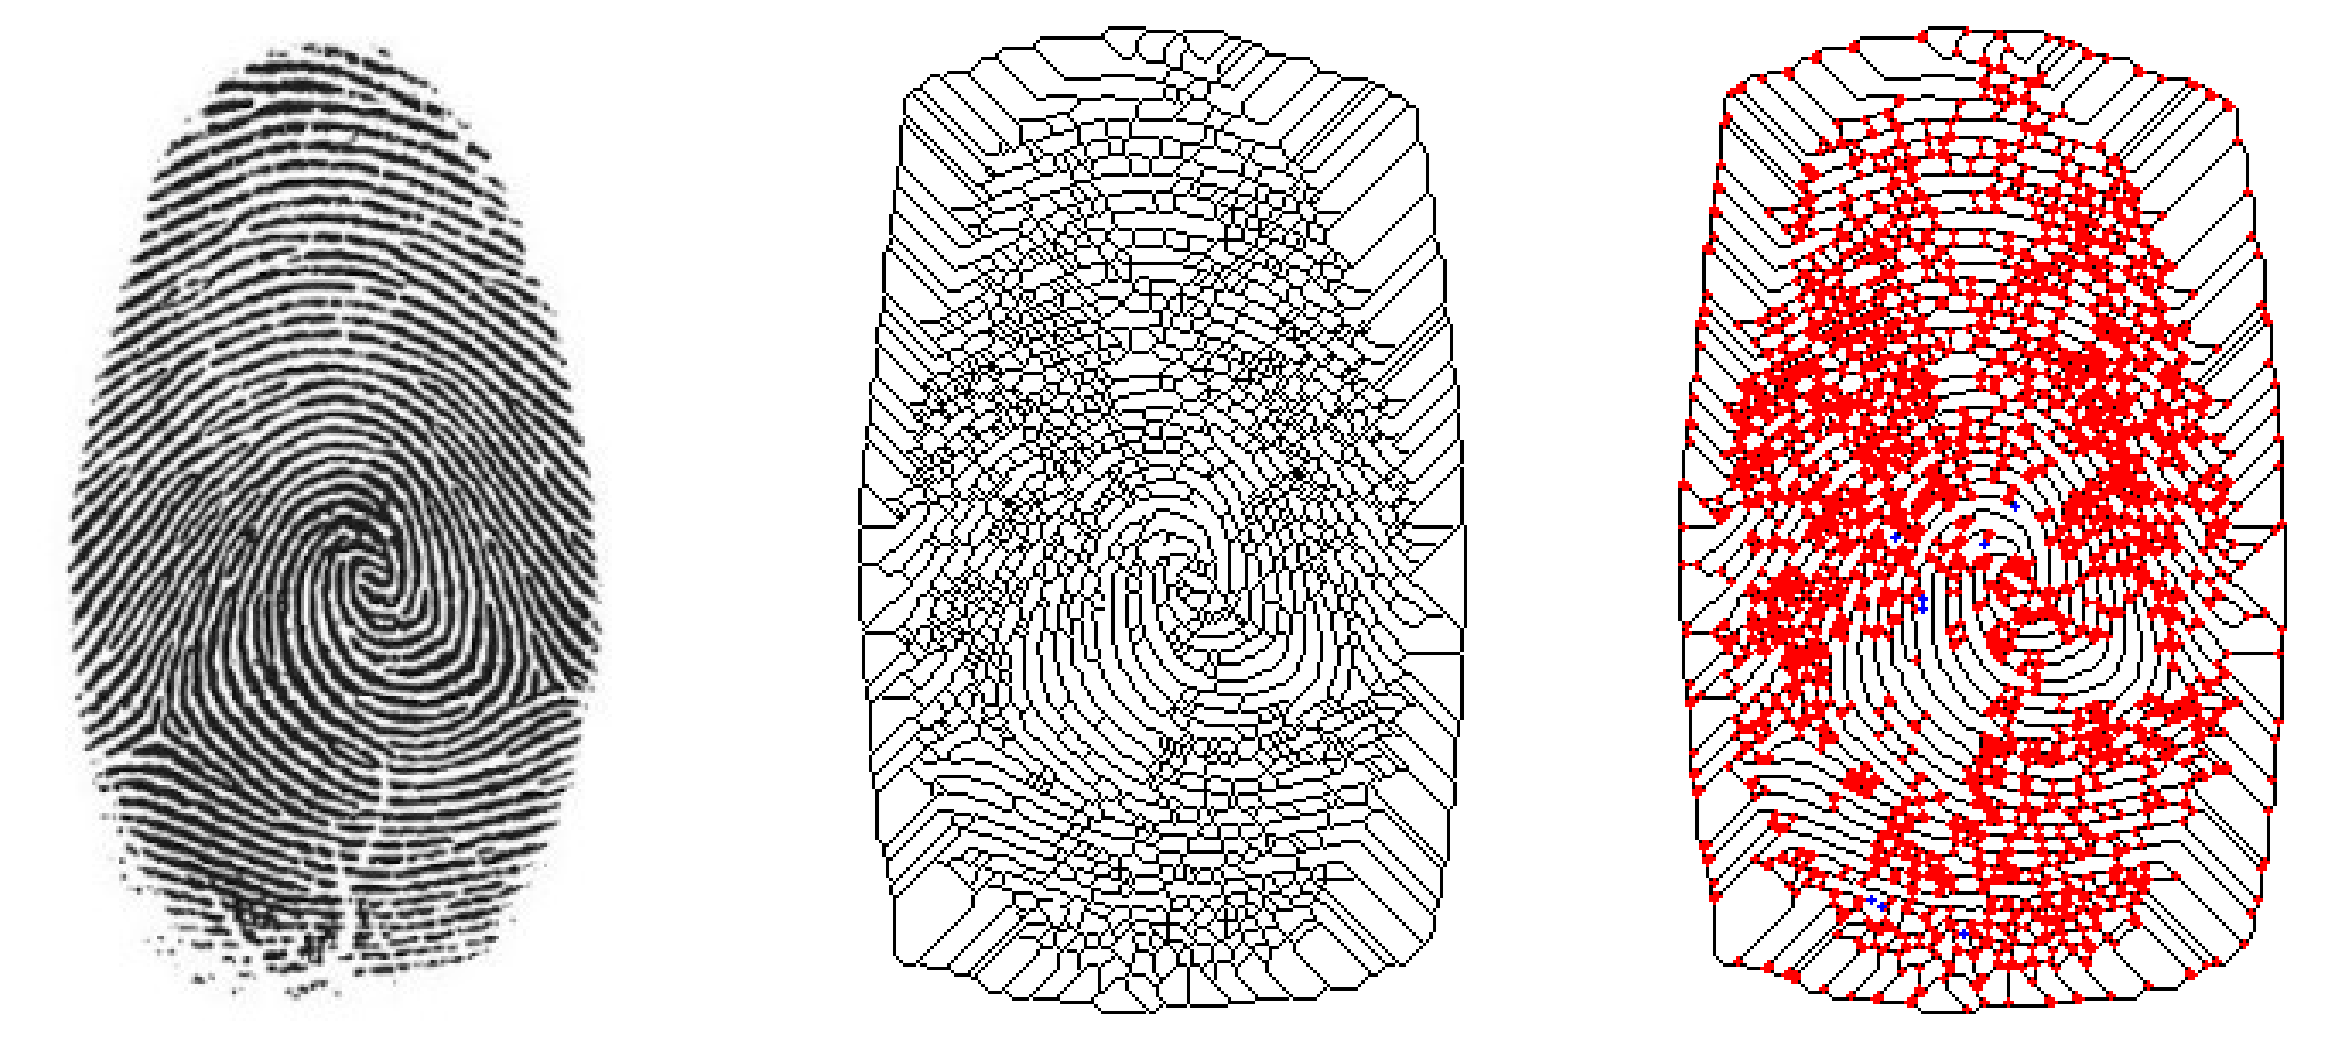

In [76]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
path = images_path[0]
#for path in images_path:
image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

skelet = skeletonize(binarized, method='lee')
skel_inv = np.array([np.array([(np.array([255*int(not i), 255*int(not i), 255*int(not i)])) for i in j]) for j in skelet])
nodes = []
tails = []
for row_ind in range(1, len(skel_inv)-1):
    for col_ind in range(1, len(skel_inv[row_ind])-1):
        if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) > 2:
            nodes.append((col_ind, row_ind))
        if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) < 2:
            tails.append([col_ind, row_ind])
skel_inv_nodes = np.copy(skel_inv)
for node in nodes:
    skel_inv_nodes= cv2.circle(skel_inv_nodes, node, 1, (255, 0, 0), -1)
skel_inv_nodes_tails = np.copy(skel_inv_nodes)
for tail in tails:
    skel_inv_nodes_tails = cv2.circle(skel_inv_nodes_tails, tail, 1, (0, 0, 255), -1)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(30)
fig.set_figheight(20)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(skel_inv)
ax[2].imshow(skel_inv_nodes_tails)
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
plt.show()


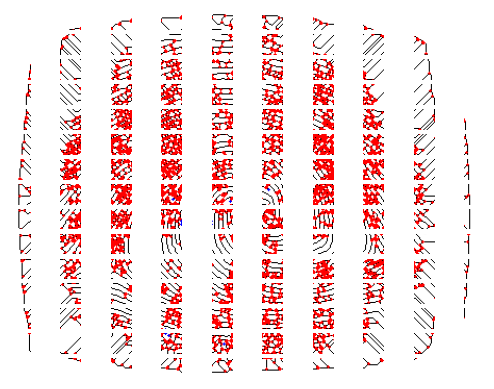

[[  0.   1.   8.   3.   6.   8.   6.   3.   0.   0.]
 [  0.   7.   6.  17.  18.  37.   4.   3.   7.   0.]
 [  5.   3.  29.  42.  22.  38.  49.   8.   1.   0.]
 [  4.   1.  33.  52.  30.  46.  77.  34.   2.   0.]
 [  8.  14.  71.  67.  43.  58.  57.  45.   3.   1.]
 [  2.  64.  96.  83.  30.  56. 118.  66.  12.   3.]
 [  7.  68.  56.  88.  63.  39.  97.  71.  21.   2.]
 [  5.  40.  96.  92.  46.  18.  96.  76.  37.   2.]
 [  2.  47.  67.  55.  34.  65.  44.  52.  14.   0.]
 [  4.  52.  71.  11.  11.  41.  15.  17.  11.   2.]
 [  5.  39.  38.  11.  16.  54.  70.  69.  21.   2.]
 [  6.  14.  14.  48.  49.  48.  23.  25.   9.   2.]
 [  9.   8.  22.  54.  52.  51.  52.  20.   2.   0.]
 [  1.   2.   7.  39.  47.  61.  41.   6.   5.   0.]
 [  0.   3.   7.  11.  11.   8.   4.   4.   0.   0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0

In [77]:
#plt.imshow(skel_inv_nodes_tails[0*20:0*20 + 20, 1*20:1*20 + 20,:])
#plt.show()
fig, ax = plt.subplots(nrows=15, ncols=10)
j = 0
ind = 0
nodes_count = np.array([])
tails_count = np.array([])
for row_ind in range(len(ax)):
    nodes_count_row = np.array([])
    tails_count_row = np.array([])
    for col_ind in range(len(ax[row_ind])):
        ax[row_ind][col_ind].imshow(skel_inv_nodes_tails[row_ind*20:row_ind*20 + 20, col_ind*20:col_ind*20 + 20,:])
        ax[row_ind][col_ind].axis(False)
        nodes_count_row = np.append(nodes_count_row, sum(1 for x,y in nodes if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
        tails_count_row = np.append(tails_count_row, sum(1 for x,y in tails if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
    nodes_count = np.append(nodes_count, nodes_count_row)
    tails_count = np.append(tails_count, tails_count_row)
plt.show()
nodes_count_input = nodes_count.reshape(len(ax), len(ax[0]))
tails_count_input = tails_count.reshape(len(ax), len(ax[0]))

print(nodes_count_input)
print(tails_count_input)
print(np.sum(tails_count_input))

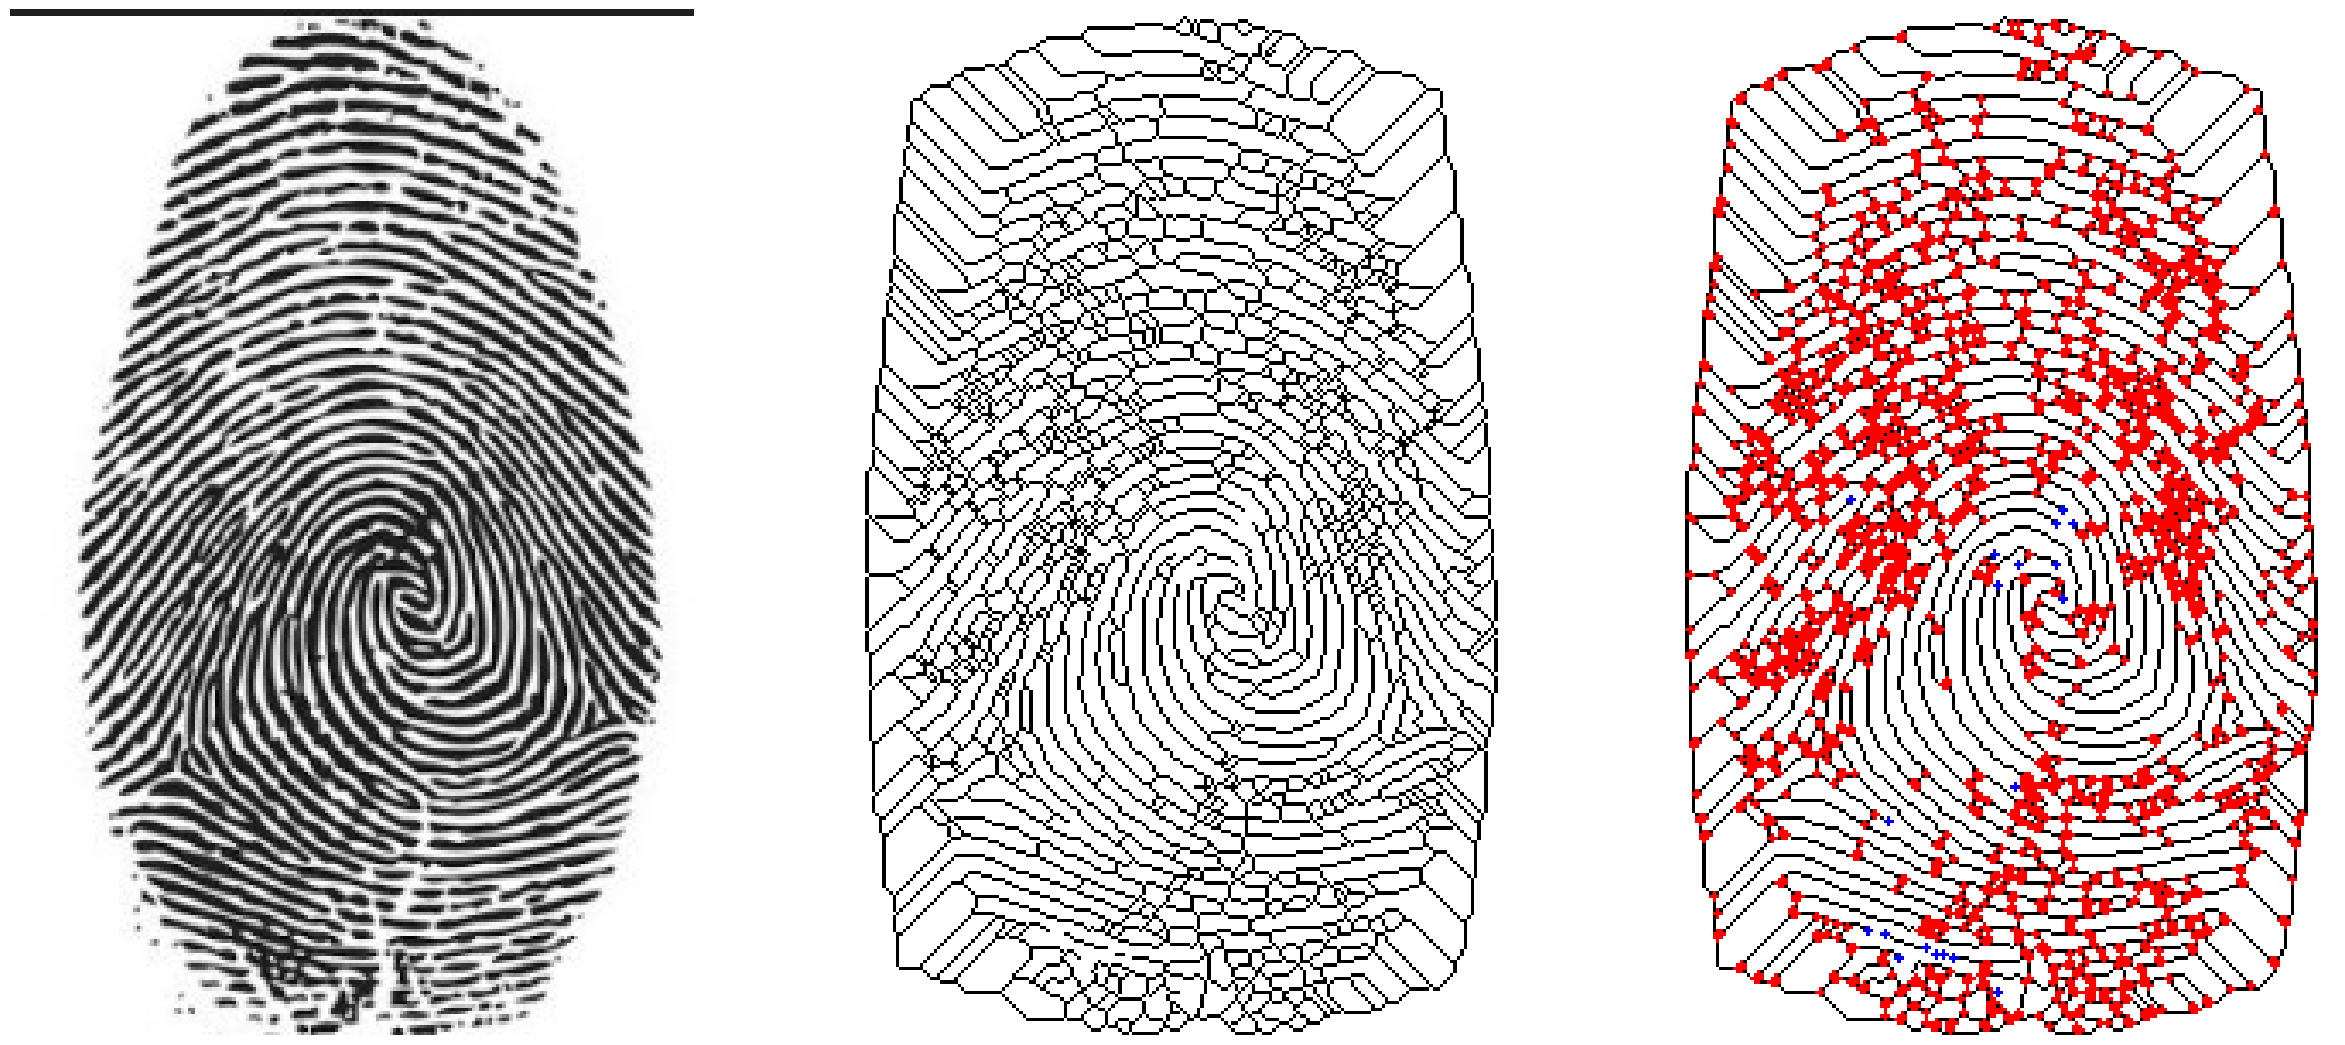

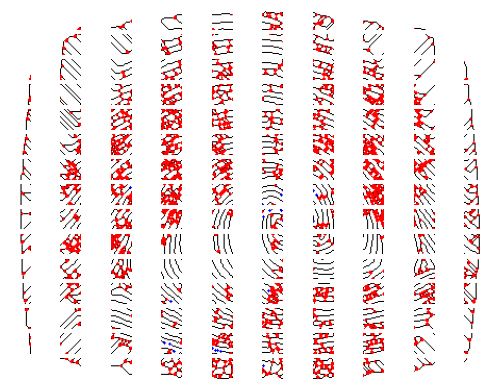


prob_nodes = 0.5191516503811915
prob_tails = 0.9227777777777779
prob_sum_nodes = 0.7117202268431002
prob_sum_tails = 0.42105263157894735



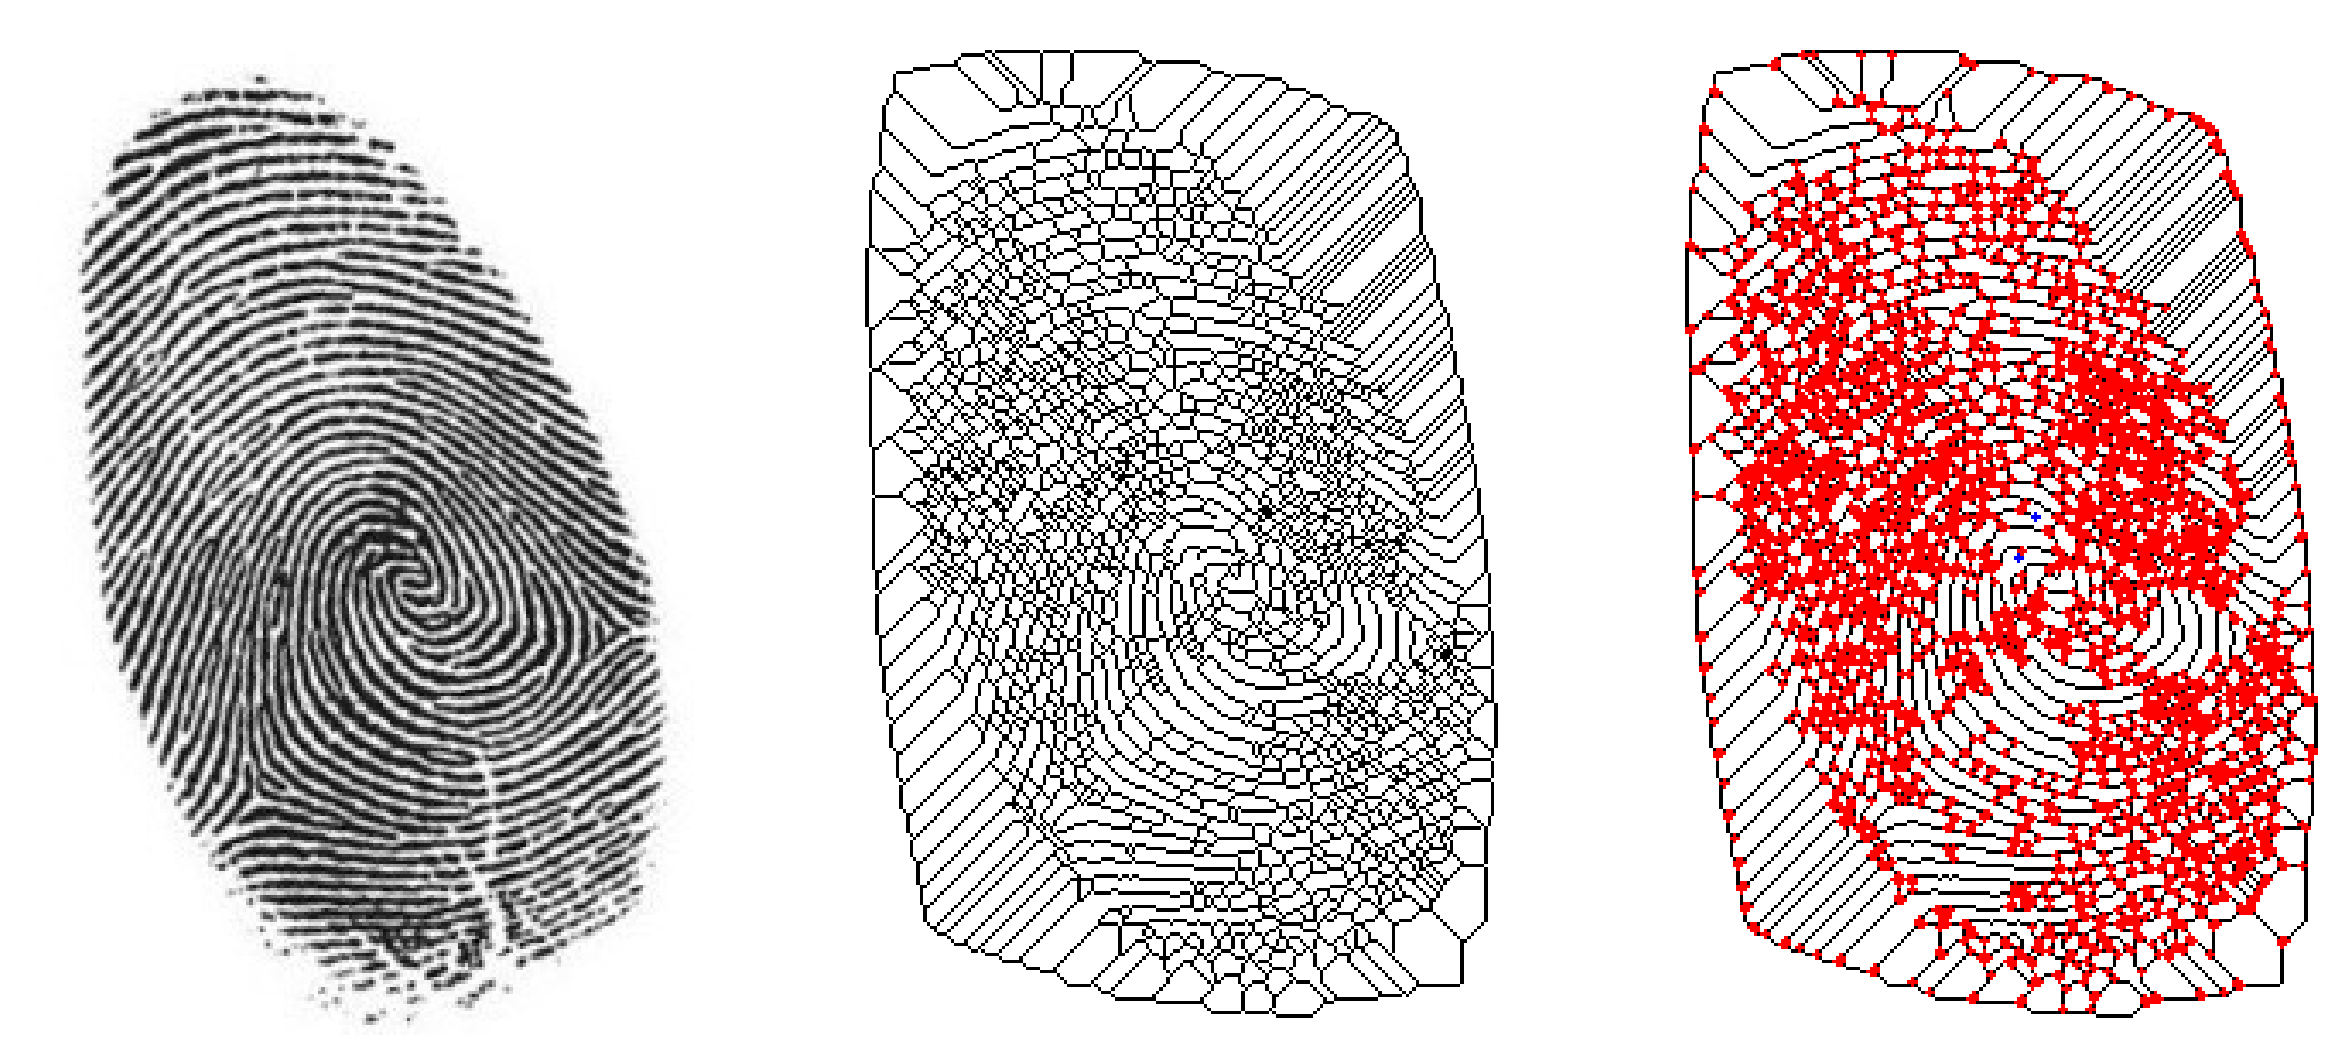

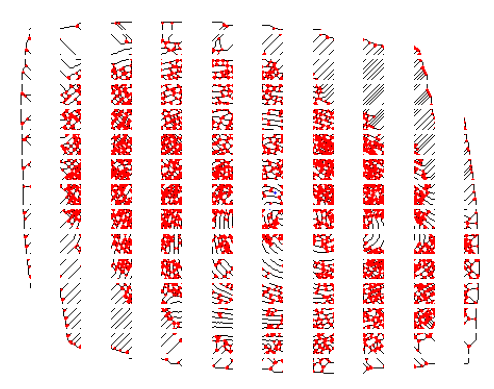


prob_nodes = 0.5281039226059631
prob_tails = 0.96
prob_sum_nodes = 0.9000425350914505
prob_sum_tails = 0.25



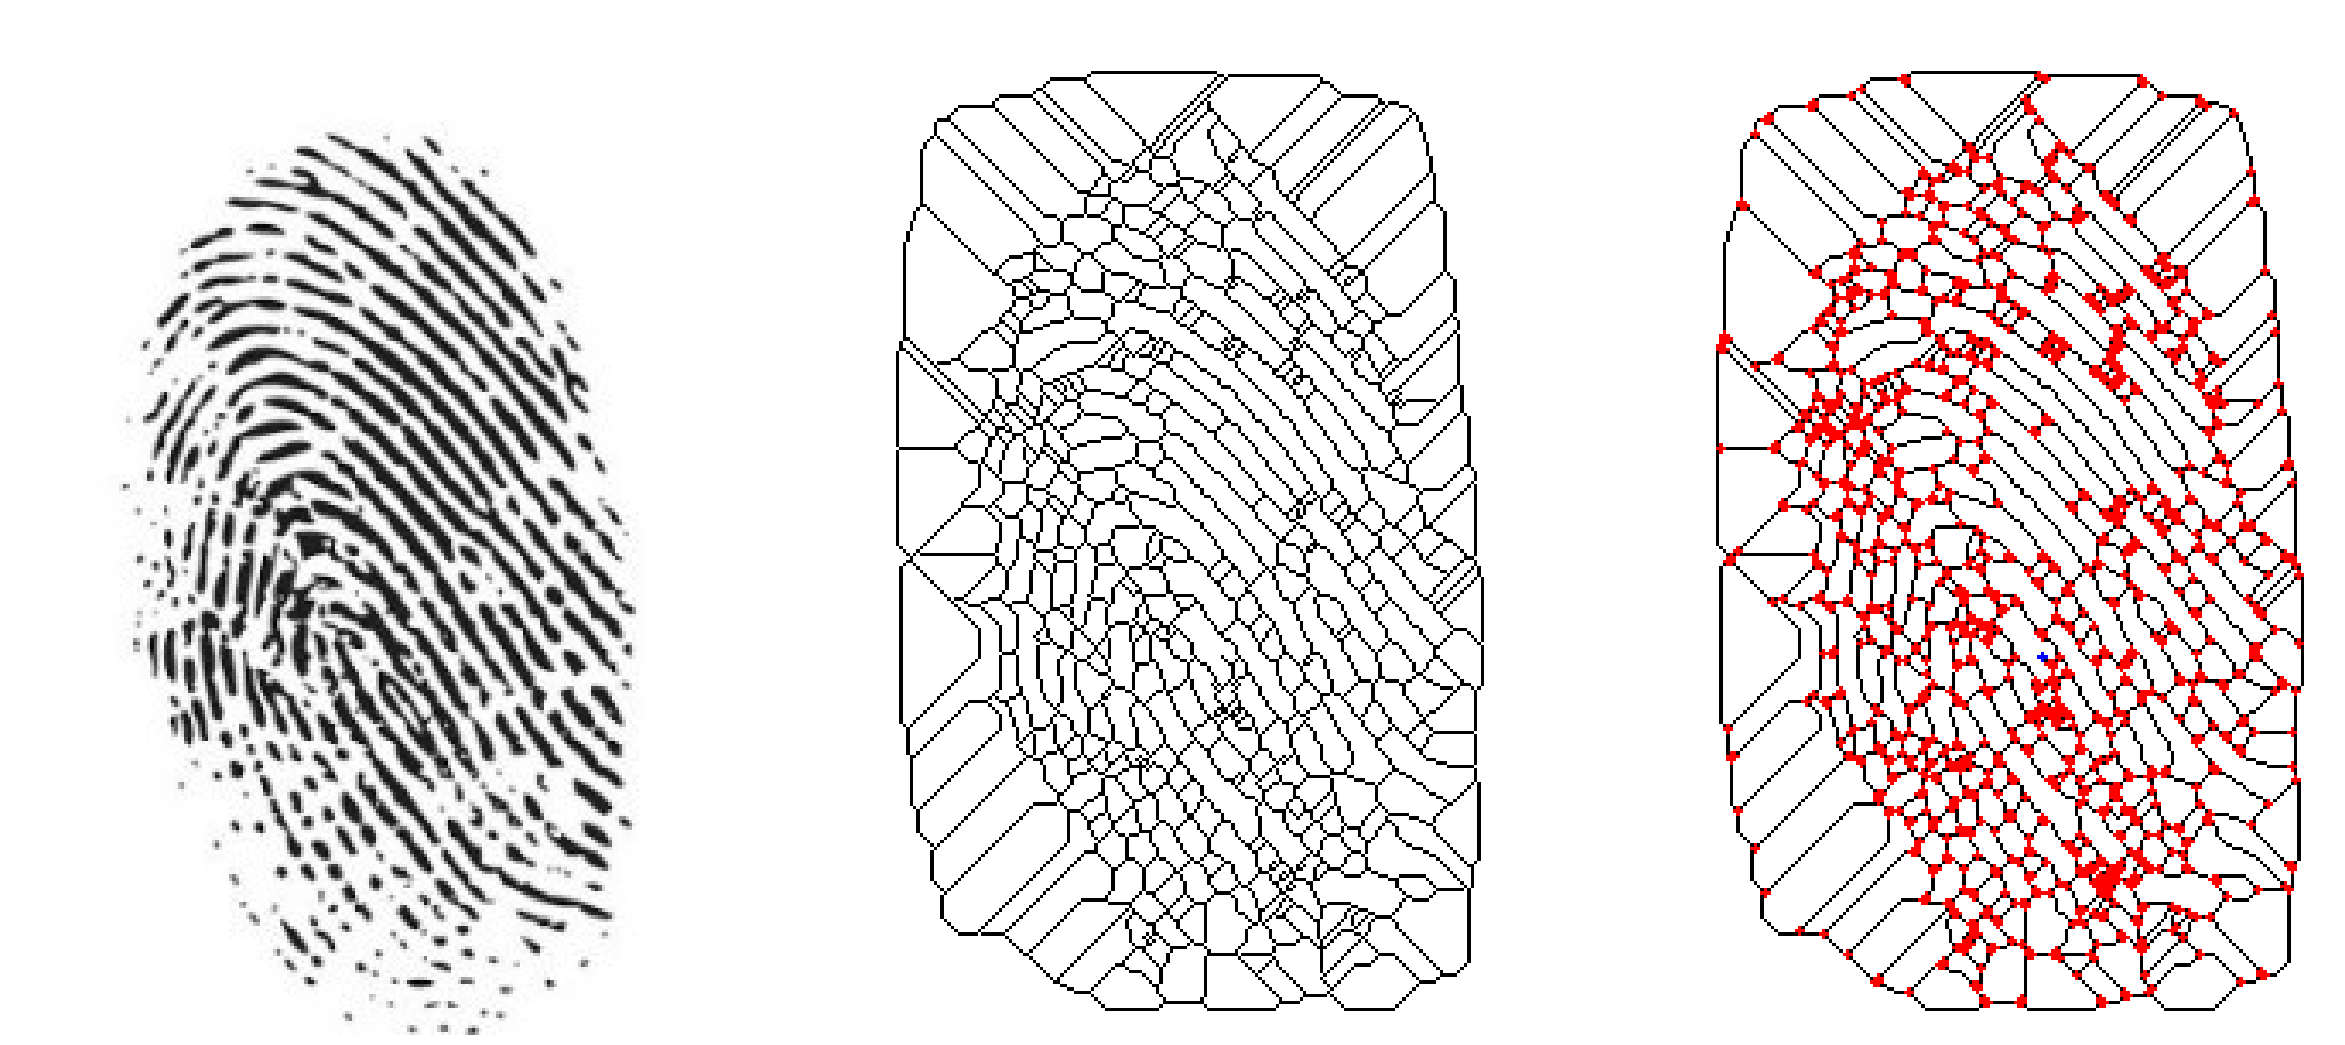

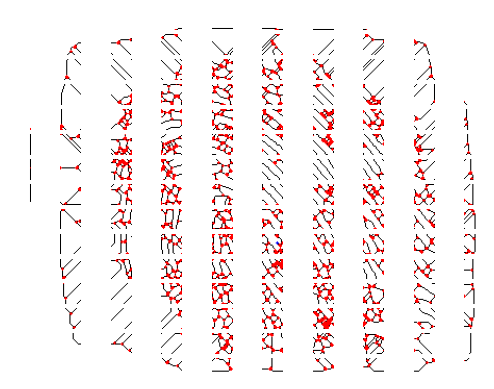


prob_nodes = 0.384216401926422
prob_tails = 0.9533333333333334
prob_sum_nodes = 0.3646030245746692
prob_sum_tails = 0.125



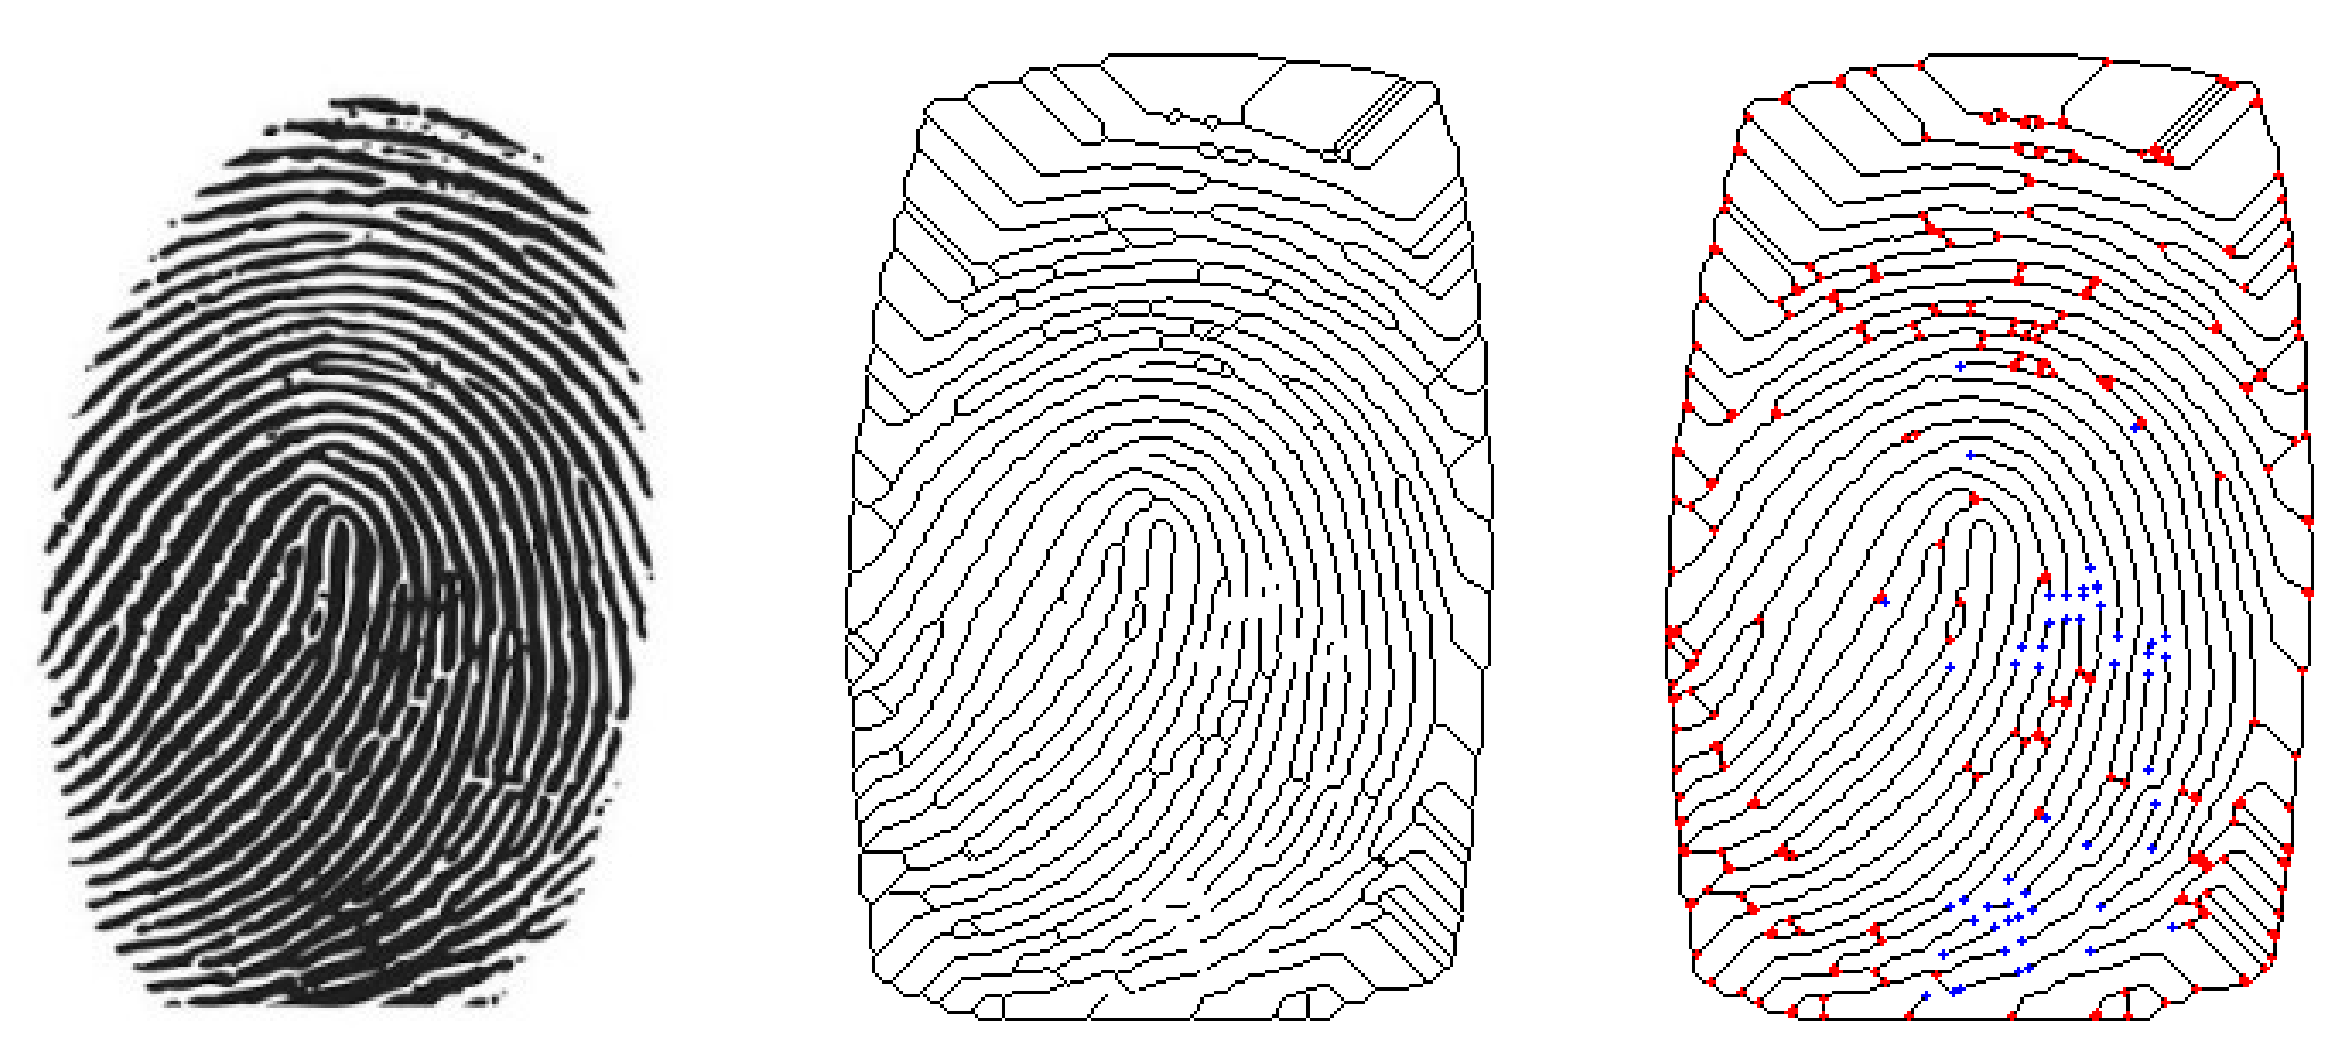

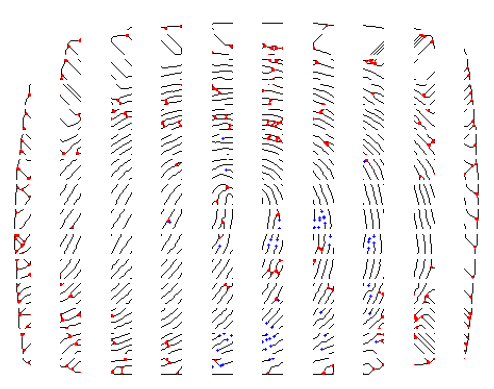


prob_nodes = 0.22003408695196414
prob_tails = 0.838
prob_sum_nodes = 0.08341209829867675
prob_sum_tails = 0.14814814814814814



In [78]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
#path = images_path[0]
for path in images_path[1:]:
    image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

    skelet = skeletonize(binarized, method='lee')
    skel_inv = np.array([np.array([(np.array([255*int(not i), 255*int(not i), 255*int(not i)])) for i in j]) for j in skelet])
    nodes = []
    tails = []
    for row_ind in range(1, len(skel_inv)-1):
        for col_ind in range(1, len(skel_inv[row_ind])-1):
            if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) > 2:
                nodes.append((col_ind, row_ind))
            if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) < 2:
                tails.append([col_ind, row_ind])
    skel_inv_nodes = np.copy(skel_inv)
    for node in nodes:
        skel_inv_nodes= cv2.circle(skel_inv_nodes, node, 1, (255, 0, 0), -1)
    skel_inv_nodes_tails = np.copy(skel_inv_nodes)
    for tail in tails:
        skel_inv_nodes_tails = cv2.circle(skel_inv_nodes_tails, tail, 1, (0, 0, 255), -1)

    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(30)
    fig.set_figheight(20)
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(skel_inv)
    ax[2].imshow(skel_inv_nodes_tails)
    ax[0].axis(False)
    ax[1].axis(False)
    ax[2].axis(False)
    plt.show()
    fig, ax = plt.subplots(nrows=15, ncols=10)
    j = 0
    ind = 0
    nodes_count = np.array([])
    tails_count = np.array([])
    for row_ind in range(len(ax)):
        nodes_count_row = np.array([])
        tails_count_row = np.array([])
        for col_ind in range(len(ax[row_ind])):
            ax[row_ind][col_ind].imshow(skel_inv_nodes_tails[row_ind*20:row_ind*20 + 20, col_ind*20:col_ind*20 + 20,:])
            ax[row_ind][col_ind].axis(False)
            nodes_count_row = np.append(nodes_count_row, sum(1 for x,y in nodes if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
            tails_count_row = np.append(tails_count_row, sum(1 for x,y in tails if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
        nodes_count = np.append(nodes_count, nodes_count_row)
        tails_count = np.append(tails_count, tails_count_row)
    plt.show()
    nodes_count = nodes_count.reshape(len(ax), len(ax[0]))
    tails_count = tails_count.reshape(len(ax), len(ax[0]))

    #print(nodes_count)
    #print(tails_count)

    prob_nodes = 0
    prob_tails = 0
    count = 0
    prob_sum_tails = min(np.sum(tails_count), np.sum(tails_count_input))/max(np.sum(tails_count), np.sum(tails_count_input))
    prob_sum_nodes = min(np.sum(nodes_count), np.sum(nodes_count_input))/max(np.sum(nodes_count), np.sum(nodes_count_input))
    for row_ind in range(len(nodes_count)):
        for col_ind in range(len(nodes_count[row_ind])):
            count += 1
            if tails_count[row_ind, col_ind] == tails_count_input[row_ind, col_ind]:
                prob_tails +=1
            else:
                prob_tails += min(tails_count[row_ind, col_ind], tails_count_input[row_ind, col_ind]) / max(tails_count[row_ind, col_ind], tails_count_input[row_ind, col_ind]) 
            if nodes_count[row_ind, col_ind] == nodes_count_input[row_ind, col_ind]:
                prob_nodes +=1
            else:
                prob_nodes += min(nodes_count[row_ind, col_ind], nodes_count_input[row_ind, col_ind]) / max(nodes_count[row_ind, col_ind], nodes_count_input[row_ind, col_ind])
    prob_nodes /= count
    prob_tails /= count
    print(f'\nprob_nodes = {prob_nodes}\nprob_tails = {prob_tails}\nprob_sum_nodes = {prob_sum_nodes}\nprob_sum_tails = {prob_sum_tails}\n')